In [10]:
%matplotlib inline

请在继续之前安装 SymPy。 有关说明，请参见第 0 章。

在开始之前，请确保您了解如何使用 [Jupyter Notebooks](http://jupyter.org/)，并熟悉 [SciPy](https://scipy.org)、[NumPy](http: //www.numpy.org/) 和 [Matplotlib](https://matplotlib.org/) 包，因为它们在本书中使用。 前言章节包含对这些包的介绍。

## Building Intuition via Thought Experiments

想象一下，我们生活在一个没有秤的世界——你站着称重的设备。 有一天，一位同事跑到你面前，向你宣布她发明了一个“秤”。 她解释后，你急切地站在上面宣布结果：“172 磅”。 你欣喜若狂——你有生以来第一次知道自己的体重。 更重要的是，当您想象将此设备出售给世界各地的减肥诊所时，美元符号在您的眼中翩翩起舞！ 这是太棒了！

另一位同事听到骚动，过来看看你有什么这么兴奋。 您解释了这项发明并再次踏上秤，并自豪地宣布结果：“161 磅”。 然后你犹豫，困惑。

“几秒钟前它读到 172 磅”，你向你的同事抱怨。

“我从来没有说过它是准确的，”她回答说。

传感器不准确。 这是大量过滤工作背后的动机，解决这个问题是本书的主题。 我可以提供过去半个世纪以来开发的解决方案，但这些解决方案是通过向我们所知道的本质以及我们如何知道的问题提出非常基本的基本问题而开发的。 在我们尝试数学之前，让我们跟随发现之旅，看看它是否告诉我们关于过滤的直觉。

**Try Another Scale**

我们有什么办法可以改进这个结果吗？ 显而易见，首先要尝试的是获得更好的传感器。 不幸的是，您的同事告诉您，她已经制作了 10 个秤，并且它们的操作精度都差不多。 你让她拿出另一个秤，你在一个秤上称自己，然后在另一个秤上称。 第一个刻度 (A) 读取“160 磅”，第二个 (B) 读取“170 磅”。 关于您的体重，我们可以得出什么结论？

那么，我们的选择是什么？

* 我们可以选择只相信 A，并为我们的重量估计分配 160 磅。
* 我们可以选择只相信 B，并为我们的体重分配 170 磅。
* 我们可以选择一个小于 A 和 B 的数字。
* 我们可以选择一个大于 A 和 B 的数字。
* 我们可以在 A 和 B 之间选择一个数字。

前两个选择是合理的，但我们没有理由偏爱一个尺度而不是另一个尺度。为什么我们会选择相信 A 而不是 B？我们没有理由相信这种信念。第三和第四个选择是不合理的。诚然，这些量表不是很准确，但完全没有理由选择超出它们测量范围的数字。最后的选择是唯一合理的选择。如果两个体重秤都不准确，并且很可能给出高于我实际体重的结果，那么答案往往介于 A 和 B 之间。

在数学中，这个概念被形式化为 [*expected value*](https://en.wikipedia.org/wiki/Expected_value)，我们稍后会深入介绍它。现在问问自己，如果我们读取一百万个读数，会发生什么“通常”的事情。有时两个秤的读数都太低，有时两个秤都读数太高，而在其余时间，它们会跨越实际重量。如果它们跨越实际重量，那么我们当然应该在 A 和 B 之间选择一个数字。如果它们不跨越，那么我们不知道它们是太高还是太低，但是通过在 A 和 B 之间选择一个数字，我们最小程度地减轻最差测量的影响。例如，假设我们的实际体重是 180 磅。 160磅是一个很大的错误。但是，如果我们选择 160 磅到 170 磅之间的重量，我们的估计将优于 160 磅。如果两个秤返回的值大于实际重量，则相同的论点成立。

我们稍后会更正式地处理这个问题，但现在我希望很清楚我们的最佳估计是 A 和 B 的平均值。

$$\frac{160+170}{2} = 165$$

我们可以用图形来查看。 我绘制了 A 和 B 的测量值，假设误差为 $\pm$ 8 lbs。 测量值介于 160 和 170 之间，因此唯一有意义的重量必须在 160 和 170 磅之间。

In [17]:
#format the book
import book_format
book_format.set_style()

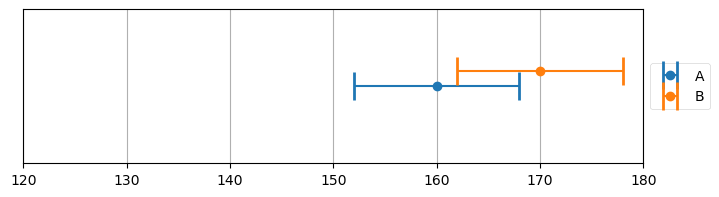

In [18]:
import kf_book.book_plots as book_plots
from kf_book.book_plots import plot_errorbars
plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(120, 180))

关于我如何生成这个情节的一句话。我从 `kf_book` 子目录中的模块 book_plots 导入代码。生成这个情节需要大量的样板 Python，阅读起来并不有趣。我在书中经常采用这种方法。当单元格运行时，`plot_errorbars()` 被调用并且情节被插入到书中。

如果这是您第一次使用 [Jupyter Notebook](http://jupyter.org/)，上面的代码在 *cell* 中。文本“In [2]:”将其标记为可以输入输入的单元格，括号中的数字表示该单元格是第二个运行的。要运行单元格，请用鼠标单击它以使其具有焦点，然后按键盘上的 CTRL+ENTER。随着我们的继续，您将能够更改单元格内的代码并重新运行它们。尝试将值“160”、“170”和“8”更改为其他值并运行该单元格。打印输出应根据您输入的内容而变化。

如果要查看 plot_errorbars 的代码，可以在编辑器中打开它，或者创建一个新单元格并键入函数名称，后跟两个问号。按 Ctrl+Enter，您的浏览器将打开一个显示源代码的窗口。这是 Jupyter 的一个特性


```Python

    plot_errorbars??
```
or
```Python
    plot_errorbars?
```

所以 165 磅看起来是一个合理的估计，但这里有更多信息可供我们利用。唯一可能的重量位于 A 和 B 的误差线之间的交点处。例如，161 磅的重量是不可能的，因为秤 B 无法给出 170 磅的读数，最大误差为 8 磅。同样，169 磅的重量是不可能的，因为秤 A 无法给出 160 磅的读数，最大误差为 8 磅。在这个例子中，唯一可能的重量在 162 到 168 磅的范围内。

这还不能让我们找到更好的重量估计，但让我们再玩一下“假设”。如果我们现在被告知 A 的准确性是 B 的三倍呢？考虑我们上面列出的 5 个选项。选择 A 和 B 范围之外的数字仍然没有意义，所以我们不会考虑这些。选择 A 作为我们的估计似乎更有说服力——毕竟，我们知道它更准确，为什么不使用它来代替 B？ B 能否单独提高我们对 A 的知识？

答案也许与直觉相反，是的，它可以。首先，让我们看看 A=160 和 B=170 的相同测量值，但 A 的误差为 $\pm$ 3 lbs，B 的误差是 3 倍，$\pm$ 9 lbs。

In [10]:
plot_errorbars??

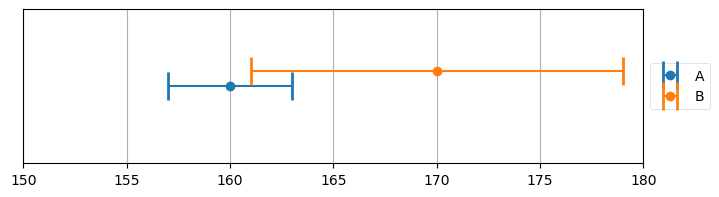

In [19]:
plot_errorbars([(160, 3, 'A'), (170, 9, 'B')], xlims=(150, 180))

A 和 B 的误差条的重叠是唯一可能的真实权重。 这种重叠小于单独 A 中的误差。 更重要的是，在这种情况下，我们可以看到重叠不包括 160 磅或 165 磅。 如果我们只使用 A 的测量值，因为它比 B 更准确，我们将给出 160 磅的估计值。 如果我们平均 A 和 B，我们将得到 165 磅。 鉴于我们对秤的准确性的了解，这些权重都不可能。 通过包括 B 的测量值，我们将给出一个介于 161 磅和 163 磅之间的估计值，即两个误差线交叉点的极限。

让我们把它发挥到极致。 假设我们知道秤 A 精确到 1 磅。换句话说，如果我们真的重 170 磅，它可能会报告 169、170 或 171 磅。 我们也知道比例 B 精确到 9 磅。 我们对每个秤进行称重，得到 A=160，B=170。 我们应该估计我们的体重是多少？ 让我们用图形来看看。

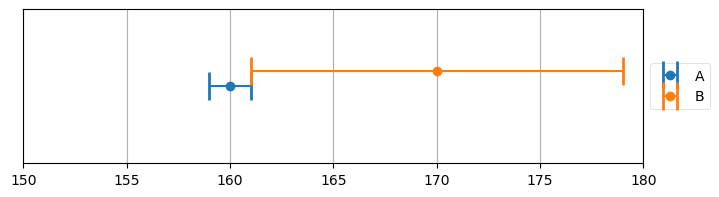

In [20]:
plot_errorbars([(160, 1, 'A'), (170, 9, 'B')], xlims=(150, 180))

在这里我们可以看到唯一可能的重量是 161 磅。这是一个重要的结果。使用两个相对不准确的传感器，我们能够推断出非常准确的结果。

**因此，两个传感器，即使一个不如另一个准确，也比一个好。**我将在本书的其余部分继续讨论这一点。我们从不丢弃信息，无论信息多么糟糕。我们将开发数学和算法，使我们能够包含所有可能的信息来源，以形成可能的最佳估计。

然而，我们已经偏离了我们的问题。没有客户会想要购买多个秤，此外，我们最初假设所有秤都同样（不）准确。这种不管精度如何都使用所有测量的洞察力将在以后发挥重要作用，所以不要忘记它。

如果我有一个秤，但我称自己很多次怎么办？我们得出的结论是，如果我们有两个精度相同的天平，我们应该对它们的测量结果进行平均。如果我用一个秤称自己 10,000 次怎么办？我们已经说过，比例尺返回一个太大的数字和返回一个太小的数字一样可能。证明大量权重的平均值会非常接近实际重量并不难，但现在让我们编写一个模拟。我将使用 NumPy，它是 [SciPy](https://scipy.org/) 生态系统的一部分，用于数值计算。

In [21]:
import numpy as np
measurements = np.random.uniform(160, 170, size=10000)
mean = measurements.mean()
print(f'Average of measurements is {mean:.4f}')


Average of measurements is 164.9760


打印的确切数字取决于您的随机数生成器，但它应该非常接近 165。

这段代码做了一个可能不正确的假设——对于 165 磅的真实重量，秤的读数可能是 160 和 165。 这几乎从来都不是真的。 真正的传感器更有可能获得更接近真实值的读数，并且越远离它获得的真实值就越不可能获得读数。 我们将在高斯章节中详细介绍这一点。 现在，我将不加解释地使用 `numpy.random.normal()` 函数，它会在 165 lbs 附近产生更多的值，而在更远的地方产生更少的值。 现在相信它会产生类似于真实秤的工作方式的嘈杂测量。

In [22]:
mean = np.random.normal(165, 5, size=10000).mean()
print(f'Average of measurements is {mean:.4f}')

Average of measurements is 165.0050


答案再次非常接近 165。

好的，太好了，我们的传感器问题有了答案！但这不是一个非常实用的答案。没有人有耐心称自己一万次，甚至十几次。

所以，让我们进行一个假设。假设您每天测量一次体重，得到的读数是 170、161 和 169，会怎样。你是变重了，还是变轻了，或者这一切都只是嘈杂的测量结果？

这不能轻易得出结论。第一次测量为 170磅，最后一次测量为 169磅，这意味着损失了 1 磅。但如果秤只精确到 10 磅，那可以用噪音来解释。实际上我体重可能在增加；也许第一天我的体重是 165 磅，第三天是 172 磅。随着体重的增加，有可能获得这些体重读数。我的体重秤告诉我，我体重在减小，而实际上我的体重在增加！让我们用图表来看看。我已经绘制了测量值和误差线，然后是一些可能的体重增加/减少，这些测量值可以用虚线绿线来解释。

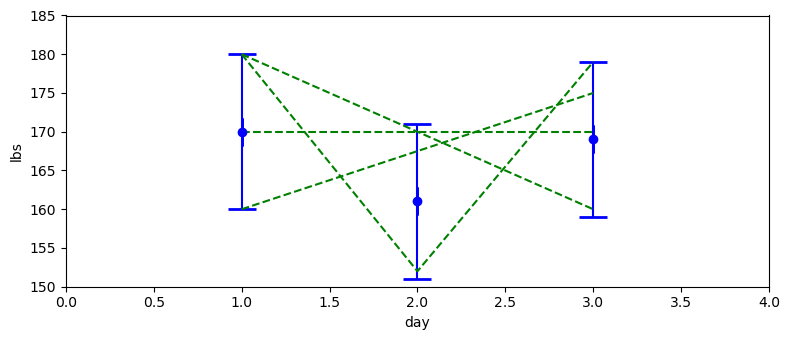

In [23]:
import kf_book.gh_internal as gh
gh.plot_hypothesis1()

正如我们所看到的，这三个测量值可以解释体重变化的极端范围。事实上，有无数种选择。我们要放弃吗？没门！回想一下，我们正在谈论测量一个人的体重。没有一种合理的方式可以让一个第 1 天重 180 磅的人，在第 3 天变为 160 磅。或者在一天内减掉 30 磅，第二天又恢复（我们假设没有截肢或其他创伤发生在人）。

我们正在测量的物理系统的行为应该影响我们如何解释测量结果。如果我们每天都在称一块石头，我们会将所有的变化都归因于噪音。如果我们称量一个由雨水供应（雨水收集器）并用于家务的蓄水池，我们可能会相信这种重量变化是真实的。
 
假设我采用不同的称，得到以下测量值：169、170、169、171、170、171、169、170、169、170。你的直觉告诉你什么？例如，您有可能每天体重增加 1 磅；而从带噪声的测量过程看，其结果恰好看起来您的体重保持不变。同样，您可以每天减掉 1 磅，并获得相同的读数。但这有可能吗？掷硬币并连续得到 10 个正面的可能性有多大？不太可能。我们不能仅仅根据这些读数来证明这一点，但我的体重似乎很可能保持稳定。在下面的图表中，我用误差线绘制了测量值，并用虚线绿色绘制了可能的真实重量。这条虚线并不意味着是这个问题的“正确”答案，只是一个合理的并且可以通过测量来解释的答案。

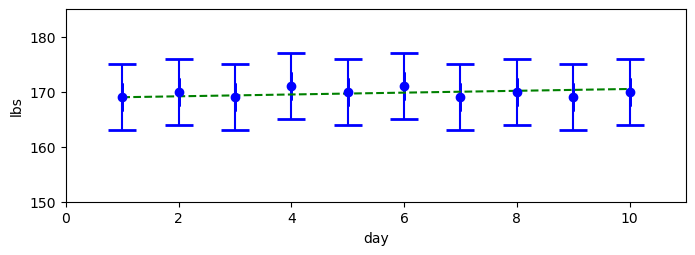

In [24]:
gh.plot_hypothesis2()

另一个假设：如果读数是 158.0、164.2、160.3、159.9、162.1、164.6、169.6、167.4、166.4、171.0，该怎么办？ 让我们看一张图表，然后回答一些问题。

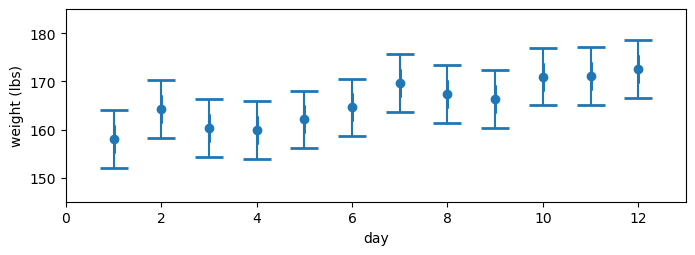

In [25]:
gh.plot_hypothesis3()

我是否“似乎”真正变轻了，而这只是一个非常嘈杂（噪声过大）的数据？ 不可能。 我是否有可能一直保持着一个体重？ 同样不可能。 该数据随时间呈上升趋势，虽然不是均匀的，但肯定是上升的。 虽然我们不能肯定，但这看起来像是体重增加，而且是一个明显的体重增加。 让我们用更多的图来测试这个假设。 与表格相比，在图表中“观察”数据通常更容易。

因此，让我们看两个假设。 首先，假设我们的体重没有变化。 为了得到这个数字，我们同意我们应该平均测量值。 让我们看看。
注：红色是假设线（即体重不变），蓝色是体重测量值和误差限

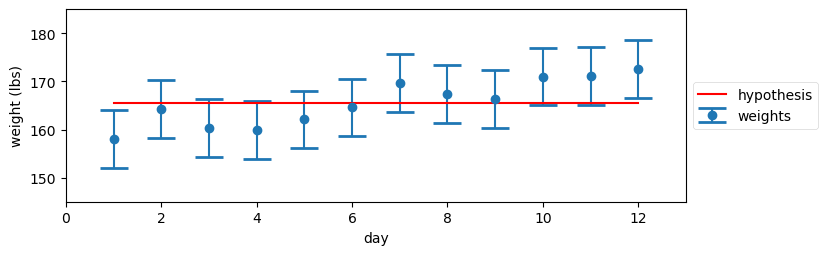

In [26]:
gh.plot_hypothesis4()

这（体重不变的假设）看起来不是很有说服力。 事实上，没有任何一条水平线能穿过所有的误差限区间。

现在，假设我们体重增加了。 增加了多少，我不知道，但 NumPy 知道！ 我们想通过测量值画一条看起来“大约”正确的线。 NumPy 函数将根据一个称为“最小二乘拟合”的规则来实现这一点。 我们不用担心计算的细节（如果你有兴趣，我使用 [polyfit()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)），只需绘制结果。

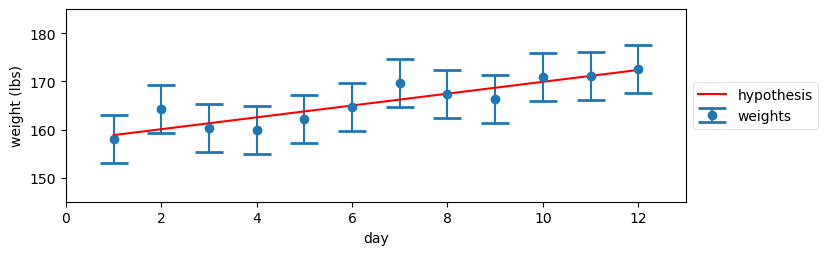

In [27]:
gh.plot_hypothesis5()

至少在我看来,这个结果好多了。现在请注意，假设非常接近每个测量值，而在前面的图中，假设通常离测量值很远。我体重增加的可能性似乎远大于我没有体重增加的可能性。我真的增加了13磅吗？没人能得出结论，这似乎无法回答。

“但不可能吗？”管一个同事。

让我们尝试一些疯狂的事情。假设我知道我每天增加大约1磅。我现在怎么知道并不重要，假设我知道它大致正确。也许我每天节食 6000 卡路里，这会导致体重增加。或者也许有另一种方法来估计体重增加。这是一个思想实验，细节并不重要。让我们看看我们是否可以利用这些信息（如果有的话）。

第一次测量是 158磅。我们无法知道有什么不同，所以让我们接受它作为我们的估计。如果我们今天的体重是158磅，明天会是什么？好吧，我们认为我们每天体重增加 1 磅，所以我们的预测是 159，如下所示：

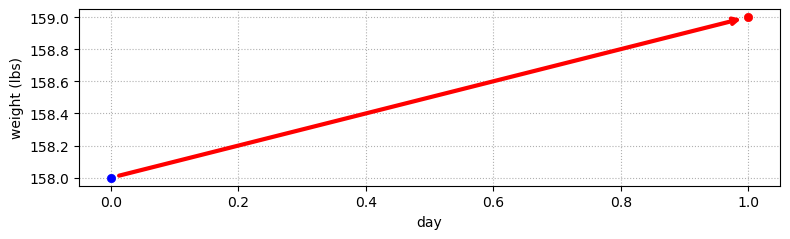

In [28]:
gh.plot_estimate_chart_1()

好吧，但这有什么好处呢？ 当然，我们可以假设 1 磅/天是准确的，并预测我们未来 10 天的体重，但是如果我们纳入体重秤的读数，那为什么还要使用秤呢？ 所以让我们看看接下来的测量值。 我们再次踏上秤，它显示 164.2 磅。

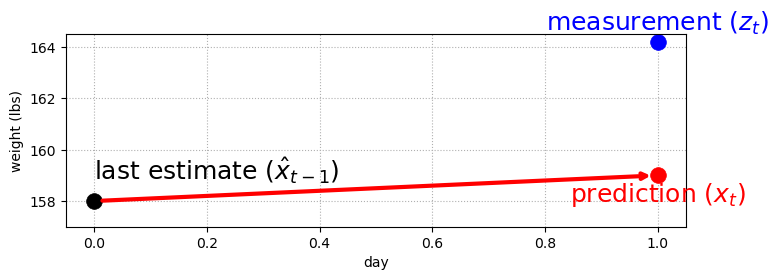

In [30]:
gh.plot_estimate_chart_2()

问题出现了。 我们的预测与我们的测量不符。 但是，这正是我们所期望的，对吧？ 如果预测总是与测量结果完全相同，那么它将无法向滤波器（filter）添加任何信息。 而且，由于我们的预测是完美的，因此没有理由进行测量。

> **整本书的关键见解在下一段。 仔细阅读！**

那么我们该怎么办？ 如果我们仅从测量中形成估计，那么预测将不会影响结果。 如果我们只从预测中形成估计，那么测量将被忽略。 如果要做到这一点，我们需要采取某种**预测（perdiction）和测量（measurement）相结合的办法**（我已将关键点加粗）。

混合两个值（结合预测值和测量值） - 这听起来很像之前的两个比例问题。使用与之前相同的推理，我们可以看到唯一有意义的是在预测和测量之间选择一个数字。例如，165 的估计没有意义，157 也没有。我们的估计应该介于 159（预测）和 164.2（测量）之间。

再来一次，这太重要了。我们认为，当呈现两个有错误的值时，我们应该在这两个值之间形成一个估计值。这些值是如何产生的并不重要。在本章的开头，我们进行了两次测量，但现在我们进行了一次测量和一次预测。在这两种情况下，推理和数学都是相同的。我们*从不*丢弃信息。我是认真的。我看到很多商业软件会丢弃噪声数据。不要这样做！我们对体重增加的预测可能不是很准确，但只要有一些信息我们就应该使用它。

我必须坚持让你停下来好好想想。我所做的只是用基于人体生理学的不准确体重预测取代了不准确的体重秤。它仍然是数据。数学不知道数据是来自体重秤还是预测。我们有两条带有一定噪声的数据，我们想将它们组合起来。在本书的其余部分中，我们将开发一些相当复杂的数学来执行此计算，但数学从不关心数据来自哪里，它只根据这些值的值和准确性进行计算。

估计值是否应该介于测量和预测之间？也许吧，但总的来说，我们似乎知道我们的预测与测量结果相比，或多或少是准确的。我们预测的准确性可能与体重秤的准确性不同。回想一下，当A比B更准确时我们所做的 - 我们将答案缩放为更接近 A 而不是 B（这里A指的是预测，B指的是测量，所以下图的估计值将会更加偏向于预测）。让我们在图表中看一下。

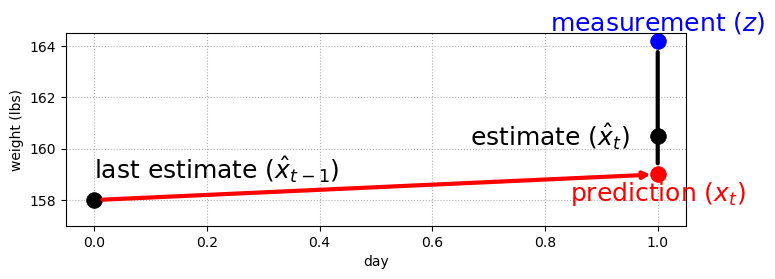

In [31]:
gh.plot_estimate_chart_3()

现在让我们尝试一个随机选择的数字来扩展我们的估计：$\frac{4}{10}$。 我们的估计将是测量值的十分之四，其余的将来自预测。 换句话说，我们在这里表达了一种信念，一种信念，即预测比测量更可能是正确的。 我们计算为

$$\mathtt{estimate} = \mathtt{prediction} + \frac{4}{10}(\mathtt{measurement} - \mathtt{prediction})$$

测量和预测之间的差异称为*残差*（residual = measurement - prediction），在上图中用黑色垂直线表示。这将成为稍后使用的重要值，因为它是对测量值和滤波器输出之间差异的精确计算。较小的残差意味着更好的性能。

让我们编写代码并查看当我们针对上面的一系列权重进行测试时的结果。我们必须考虑另一个因素。体重增加的单位是磅/时间，所以一般来说，我们需要添加一个时间步长 $t$，我们将其设置为 1（天）。

我手工生成的体重数据对应于 160 磅的真实起始体重和每天 1 磅的体重增加。换句话说，第一天（第 0 天）的真实体重是 160 磅，第二天（第一天，称重的第一天）真实体重是 161 磅，以此类推。

我们需要对初始体重进行猜测。但现在谈论初始化策略还为时过早，所以现在我假设 160 磅。

In [32]:
from kf_book.book_plots import figsize
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0  # day
scale_factor = 4.0/10

def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):     
    # storage for the filtered results
    estimates, predictions = [estimated_weight], []

    # most filter literature uses 'z' for measurements
    for z in weights: 
        # predict new position
        #                  前一时刻的状态   + 变化
        # step1 理论上的预测模型  
        predicted_weight = estimated_weight + gain_rate * time_step

        # update filter  结合这一步的预测值 + 残差（测量,这里的z是测量）
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight)

        # save and log
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)

    return estimates, predictions

initial_estimate = 160.
estimates, predictions = predict_using_gain_guess(
    estimated_weight=initial_estimate, gain_rate=1, do_print=True)  

previous estimate: 160.00, prediction: 161.00, estimate 159.80
previous estimate: 159.80, prediction: 160.80, estimate 162.16
previous estimate: 162.16, prediction: 163.16, estimate 162.02
previous estimate: 162.02, prediction: 163.02, estimate 161.77
previous estimate: 161.77, prediction: 162.77, estimate 162.50
previous estimate: 162.50, prediction: 163.50, estimate 163.94
previous estimate: 163.94, prediction: 164.94, estimate 166.80
previous estimate: 166.80, prediction: 167.80, estimate 167.64
previous estimate: 167.64, prediction: 168.64, estimate 167.75
previous estimate: 167.75, prediction: 168.75, estimate 169.65
previous estimate: 169.65, prediction: 170.65, estimate 170.87
previous estimate: 170.87, prediction: 171.87, estimate 172.16


[158.0,
 164.2,
 160.3,
 159.9,
 162.1,
 164.6,
 169.6,
 167.4,
 166.4,
 171.0,
 171.2,
 172.6]

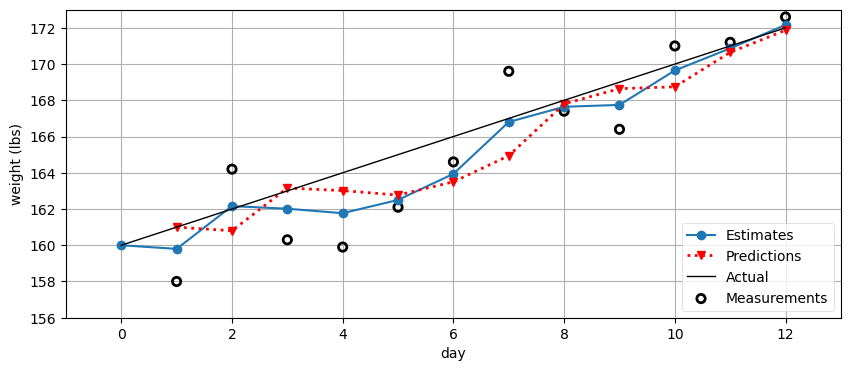

In [33]:
# plot results
book_plots.set_figsize(10)
gh.plot_gh_results(weights, estimates, predictions, [160, 172])
weights

这是相当不错的！这里有很多数据，所以我们来谈谈如何解读它。粗蓝线显示滤波器的估计值。它从第 0 天开始，最初的猜测是 160 磅。红线显示根据前一天的体重做出的预测。所以，在第一天，之前的体重是 160 磅，体重增加了 1 磅，所以第一个预测是 161 磅。第一天的估计值介于预测和测量之间，为 159.8 磅。图表下方是每天的先前重量、预测重量和新估计值的打印结果。最后，细黑线显示被称重的人的实际体重增加。

每天浏览一遍，确保您了解每个步骤的预测和估计是如何形成的。请注意，估计值总是介于测量值和预测值之间。

估计值不是一条直线，但它们比测量值更直，并且有一些点接近我们创建的趋势线。此外，随着时间的推移，它似乎会变得更好。

滤波器的结果可能会让你觉得很傻；当然，如果我们假设我们的体重增加约为 1 磅/天，那么数据看起来不错！如果我们最初的猜测是错误的，让我们看看滤波器会做什么。让我们预测每天减重 1 磅：

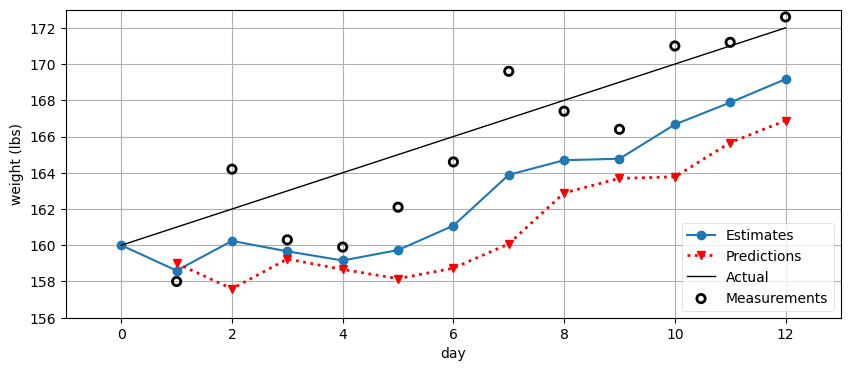

In [34]:
e, p = predict_using_gain_guess(initial_estimate, -1.)
gh.plot_gh_results(weights, e, p, [160, 172])

那不是那么令人印象深刻。 估计值很快偏离了测量值。 显然，要求我们正确猜测变化率的滤波器不是很有用。 即使我们最初的猜测是正确的，一旦变化率发生变化，滤波器也会失败。 如果我停止暴饮暴食，滤波器将很难适应这种变化。但是请注意，它正在调整！尽管我们告诉它我们每天减掉 1 磅，但估计值还在攀升（仍然是上升趋势）。 它只是不能足够快地调整。

但是，“如果”呢？ 如果我们不是将体重增加留在最初猜测的 1 磅（或其他），而是根据现有的测量值和估计值来计算它。 在第一天，我们对重量的估计是：

$$
(160 + 1) + \frac{4}{10}(158-161) = 159.8
$$

第二天我们测量到 164.2，这意味着体重增加了 4.4 磅（因为 164.2 - 159.8 = 4.4），而不是 1。我们可以以某种方式使用这些信息吗？这似乎是合理的。毕竟，体重测量本身是基于对我们体重的真实世界测量，所以蕴含有用的信息。我们对体重增加的估计可能并不完美，但肯定比仅仅猜测我们的体重增加 1 磅要好。数据比猜测要好，即使它包含噪声。

人们在这一点上真的犹豫不决，所以请确保您同意。两次包含噪声的体重测量给我们一个隐含的体重增加/减少（信息）。如果测量结果不准确，该估计将非常不准确，但此计算中仍有信息。想象一下，用精确到 1 磅的秤称一头牛，它表明（测量）这头牛增加了 10 磅。这头奶牛可能会增加 8 磅到 12 磅，具体取决于误差，但我们知道它增加了体重，以及大概增加了多少。这是信息。我们如何处理信息？永远不要扔掉它！

回到我的饮食。我们应该将新的每日增益设置为 4.4 磅吗？昨天我们认为体重增加了 1 磅，今天我们认为是 4.4 磅。我们有两个数字，想以某种方式组合它们。嗯，听起来又像我们同样的问题。让我们使用相同的工具，也是迄今为止我们唯一的工具——在两者之间选择一个值。这次我将使用另一个任意选择的数字，$\frac{1}{3}$。该方程与重量估计相同，除了我们必须包含时间，因为这是一个速率（增益/天）：

$$\text{new gain} = \text{old gain} + \frac{1}{3}\frac{\text{measurement - predicted weight}}{1 \text{ day}}
$$

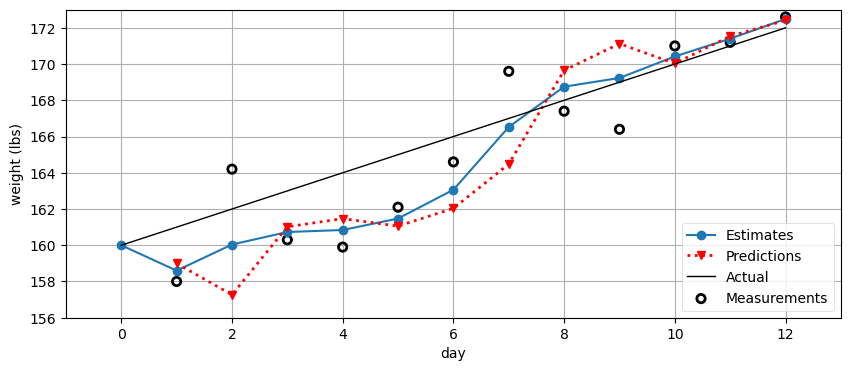

In [35]:
weight = 160.  # initial guess
gain_rate = -1.0  # initial guess

time_step = 1.
weight_scale = 4./10
gain_scale = 1./3
estimates = [weight]
predictions = []

for z in weights:
    # prediction step
    weight = weight + gain_rate*time_step
    gain_rate = gain_rate
    predictions.append(weight)
    
    # update step    
    residual = z - weight
    
    gain_rate = gain_rate + gain_scale   * (residual/time_step)
    weight    = weight    + weight_scale * residual
  
    estimates.append(weight)

gh.plot_gh_results(weights, estimates, predictions, [160, 172])

我认为这开始看起来非常好。 由于体重增加的初始猜测很差，为 -1，过滤器需要几天时间才能准确预测体重，但一旦这样做，它就会开始准确地跟踪体重。 我们没有使用任何方法来选择 $\frac{4}{10}$ 和 $\frac{1}{3}$ 的缩放因子（实际上，它们对于这个问题来说是糟糕的选择），但除此之外，所有的数学运算都遵循 来自非常合理的假设。 回想一下，您可以将参数 `time_step` 的值更改为更大的值，然后如果您想查看逐步绘制的图，请重新运行单元格。

在我们继续之前的最后一点。 在预测步骤中，我写了一行

```python
gain_rate = gain_rate
``` 
这显然没有效果，可以去掉。 我写这篇文章是为了强调在预测步骤中，您需要预测所有变量的下一个值，包括“weight”和“gain_rate”。 这将很快变得相关。 在这种情况下，我们假设增益不变，但是当我们推广该算法时，我们将删除该假设。

## The g-h Filter

该算法被称为 [g-h 滤波器](https://en.wikipedia.org/wiki/Alpha_beta_filter) 或 $\alpha$-$\beta$ 滤波器。 $g$ 和 $h$ 指的是我们在示例中使用的两个缩放因子。 $g$ 是我们用于测量的比例（在我们的示例中为体重），$h$ 是测量随时间变化的比例（在我们的示例中为磅/天）。 $\alpha$ 和 $\beta$ 只是用于这个因子的不同名称。

该滤波器是包括卡尔曼滤波器在内的大量滤波器的基础。换句话说，卡尔曼滤波器是 g-h 滤波器的一种形式，我将在本书后面证明这一点。您可能听说过的最小二乘滤波器也是如此，而您可能没有听说过的 Benedict-Bordner 滤波器也是如此。每个过滤器都有不同的方式将值分配给 $g$ 和 $h$，但其他算法是相同的。例如，Benedict-Bordner 过滤器为 $g$ 和 $h$ 分配一个常数，限制在某个值范围内。其他过滤器（例如卡尔曼）将在每个时间步动态变化 $g$ 和 $h$。

**让我重复关键点，因为它们非常重要**。如果你不理解这些，你就不会理解本书的其余部分。如果您确实理解了它们，那么本书的其余部分将自然地为您展开，作为对我们将提出的有关 $g$ 和 $h$ 的各种“假设”问题的数学阐述。数学可能看起来完全不同，但算法将完全相同。

* 多个数据点比一个数据点更准确，所以无论多么不准确，都不要扔掉。
* 始终在两个数据点之间选择一个数字部分，以创建更准确的估计。
* 根据当前估计以及我们认为它会发生多大变化来预测下一个测量值（是预测的值，不是传感器对物理世界产生的观测值）和变化率。
* 然后选择新的估计作为预测和下一个测量之间的一部分，根据每个测量的准确程度来衡量。

让我们看一下算法的可视化描述。

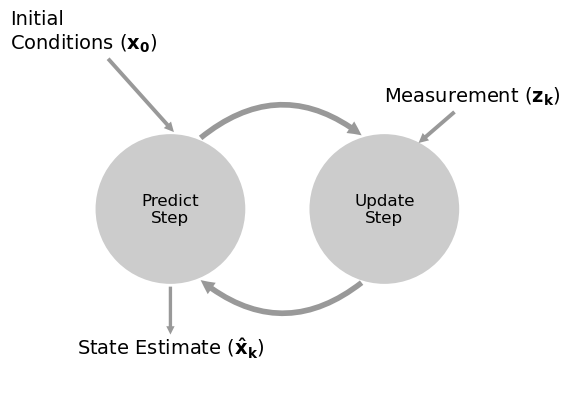

In [36]:
book_plots.predict_update_chart()

让我介绍一些更正式的术语。 *system* 是我们要估计的对象。 在本章中，系统就是我们试图衡量的任何东西。 一些文本称其为*Plant*。 该术语来自控制系统理论。 https://en.wikipedia.org/wiki/Plant_(control_theory)

系统的*状态*是我们感兴趣的系统的当前配置或值。 我们只对重量读数感兴趣。 如果我在秤上放一个 100 公斤的重量，状态是 100 公斤。 我们根据与我们相关的内容来定义状态。 称的颜色与我们无关，因此我们不将这些值包含在状态中。 制造商的 QA 工程师可能会在状态中包含颜色，以便她可以跟踪和控制制造过程。

*measurement* 是系统的测量值。 测量值可能不准确，因此它可能与状态值不同。

*state estimate（状态估计）*是我们滤波器对状态的估计。例如，对于 100 公斤的重量，由于传感器错误，我们的估计可能是 99.327 公斤。这通常缩写为 *estimate*，我在本章中已经这样做了。

换句话说，状态应该被理解为系统的实际值。这个值通常对我们*隐藏*。如果我踏上秤，你就会得到*测量*。我们称其为 *observable*，因为您可以直接观察此测量结果。相比之下，你永远无法直接观察到我的体重，你只能测量它。
*注：* 真实值永远是未知的（hidden），我们能获取的是对物理世界的观测。

这种 *hidden* 和 *observable* 的语言很重要。任何估计问题都包括通过可观察的测量来形成对隐藏状态的估计。如果您阅读文献，在定义问题时会使用这些术语，因此您需要熟悉它们。

我们使用*过程模型（Process model）*对系统进行数学建模。在本章中，我们的过程模型假设我今天的体重是昨天的体重加上我最后一天的体重增加。过程模型不对传感器建模或以其他方式说明传感器。另一个例子是汽车的过程模型。过程模型可能是“距离等于速度乘以时间。这个模型并不完美，因为汽车的速度可能会在非零时间内变化，轮胎可能会在路上打滑，等等。*system error* 或 *process error* 是此模型中的error(误差)。我们永远无法准确地知道这个值；如果我们知道，我们可以改进我们的模型以使error为零。有些文本使用 *plant model* 和 *plant error*。您可能还会看到*系统模型*。它们的意思都是一样的。

预测步骤称为*system propagation（系统传播）*。它使用*process error*来形成新的*状态估计*。由于*过程误差*，这个估计是不完美的。假设我们随着时间的推移跟踪数据，我们说我们将状态*传播*到未来。一些文章称之为*evolution（进化）*。

更新步骤称为*测量更新*。系统传播和测量更新的一次迭代称为*epoch*。（将预测和测量值融合）

现在让我们探索几个不同的问题域来更好地理解这个算法。考虑试图在轨道上跟踪火车的问题。轨道将火车的位置限制在一个非常特定的区域。此外，火车又大又慢。他们需要很长时间才能显著减速或加速。因此，如果我知道火车在时间 t 的公里标记处为 23 公里，并以 18 公里/小时的速度行驶，我可以非常有信心地预测它在时间 t + 1 秒的位置。为什么这很重要？假设我们只能以 $\pm$ 250 米的精度测量它的位置。火车以每小时 18 公里的速度行驶，即每秒 5 米。在 t+1 秒时，火车将达到 23.005 公里，但测量值可能在 22.755 公里到 23.255 公里之间。因此，如果下一次测量表明位置在 23.4，我们知道这一定是不准确的。即使在时间 t 工程师猛踩刹车，火车仍将非常接近 23.005 公里，因为火车不能在 1 秒内减速很多。如果我们要为这个问题设计一个滤波器（我们将在本章中进一步介绍！）我们会想要设计一个滤波器，它对预测赋予非常高的权重（相较于测量）。

现在考虑跟踪一个掷出的球的问题。我们知道弹道物体在重力场中在真空中以抛物线运动。但是掷出的球在地球上会受到空气阻力的影响，因此它不会以完美的抛物线运动。棒球投手在投掷曲线球时会利用这一事实。假设我们正在使用计算机视觉跟踪体育场内的球，这是我在工作中所做的事情。计算机视觉跟踪的准确性可能适中，但通过假设球在抛物线上移动来预测球的未来位置也不是非常准确。在这种情况下，我们可能会设计一个过滤器，使测量和预测的权重大致相等。

现在考虑尝试在飓风中追踪氦气球。我们没有合适的模型可以让我们预测气球的行为，除了非常短暂的时间尺度（例如，我们知道气球不能在 1 秒内飞 10 英里）。在这种情况下，我们将设计一个滤波器，强调测量而不是预测。

本书的大部分内容都致力于以数学方式表达最后三段中的关注点，从而使我们能够找到最佳解决方案（在某种数学意义上）。在本章中，我们将只是以一种更直观的方式为 $g$ 和 $h$ 分配不同的值，因此不是最优的方式。但基本思想是将有些不准确的测量与系统行为的有些不准确的模型相结合，以获得比任何一个信息源本身都更好的过滤估计。

我们可以将其表示为算法：

**初始化**

     1.初始化滤波器的状态
     2.初始化我们对状态的信念（置信程度）

**预测**

     1. 使用系统行为预测下一个时间步的状态
     2. 调整信念以解释预测中的不确定性（根据观测更新一个信念值）
    
**更新**

     1.获得关于其准确性的测量和相关信念
     2.计算估计状态和测量之间的残差
     3. 新的估计在残差线上的某处
    
我们将在整本书中使用相同的算法，尽管有一些修改。

## Notation（记号）

我将开始介绍文献中使用的符号和变量名。 其中一些已经在上面的图表中使用。 测量（或观测）通常表示为 $z$，这就是我们将在本书中使用的（一些文献使用 $y$）。 下标$k$表示时间步，所以$z_k$就是这个时间步的数据。 粗体字表示向量或矩阵。 到目前为止，我们只考虑了一个传感器，因此只有一个传感器测量值，但通常我们可能有 *n* 个传感器和 *n* 个测量值。 $\mathbf{x}$ 表示我们的状态，用粗体表示它是一个向量。 对于我们的体重秤示例，它代表初始体重和初始体重增加率，如下所示：

$$\mathbf{x} = \begin{bmatrix}x \\ \dot{x}\end{bmatrix}$$

在这里，我使用牛顿记号，在 x 上的点表示速度。 更准确地说，点表示 x 对时间的导数，当然也就是速度。 对于 62 公斤的体重，每天增加 0.3 公斤，我们有

$$\mathbf{x} = \begin{bmatrix}62 \\ 0.3\end{bmatrix}$$

所以，算法很简单。 状态由初始估计 $\mathbf{x_0}$ 初始化。 然后我们进入一个循环，根据时间（或步骤）$k-1$ 的值预测时间或步骤 $k$ 的状态。 然后我们得到测量值 $z_k$ 并选择测量值和预测之间的某个中间点，创建估计值 $\mathbf{x}_k$。

## Exercise: Write Generic Algorithm

在上面的例子中，我明确地对此进行了编码，以解决我们在整章中一直在讨论的称重问题。 例如，变量名为“weight_scale”、“gain”等。 我这样做是为了使算法易于遵循——你可以很容易地看到我们正确地实现了每个步骤。 但是，那是为一个问题编写的代码，算法对于任何问题都是相同的。 因此，让我们将代码重写为通用的 - 以解决任何问题。 使用此函数记号：


```python
def g_h_filter(data, x0, dx, g, h, dt):
    """
    Performs g-h filter on 1 state variable with a fixed g and h.

    'data' contains the data to be filtered.
    'x0' is the initial value for our state variable
    'dx' is the initial change rate for our state variable
    'g' is the g-h's g scale factor
    'h' is the g-h's h scale factor
    'dt' is the length of the time step 
    """
```

将数据作为 NumPy 数组返回，而不是列表。 通过传递与以前相同的重量数据来测试它，绘制结果，并直观地确定它是否有效。

In [37]:
from kf_book.gh_internal import plot_g_h_results
def g_h_filter(data, x0, dx, g, h, dt):
    pass #  your solution here

# uncomment to run the filter and plot the results
#book_plots.plot_track([0, 11], [160, 172], label='Actual weight')
#data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)
#plot_g_h_results(weights, data)

### Solution and Discussion

[158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
[159.2   161.8   162.1   160.78  160.985 163.311 168.1   169.696
 168.204 169.164 170.892 172.629]


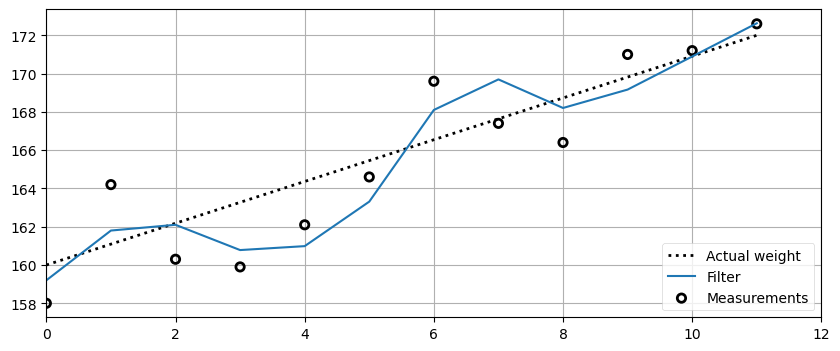

In [38]:
import matplotlib.pylab as pylab

def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        # prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        # 更新速度的变化  这里没有进行一个变加速的一个估计
        dx = dx + h * (residual) / dt
        # 更新估计值，估计值不依赖本次循环中更新的加速度，即dx
        x_est = x_pred + g * residual
        results.append(x_est)
    return np.array(results)

book_plots.plot_track([0, 11], [160, 172], label='Actual weight')
data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)
plot_g_h_results(weights, data)
print(weights)
print(data)

这应该是直截了当的。 我只是用变量名“x0”、“dx”等代替了增重代码中的变量名。 没有什么需要改变的。

## Choice of $g$ and $h$（选择 $g$ 和 $h$ ）

g-h 滤波器不是一个滤波器 - 它是一系列滤波器的类抽象（代表一类的滤波器）。 Eli Brookner 在 *Tracking and Kalman Filtering Made Easy* 中列出了 11 个，我相信还有更多。不仅如此，每种类型的过滤器都有许多子类型。每个滤波器的区别在于 $g$ 和 $h$ 的选择方式。所以我不能在这里给出“一刀切”的建议。一些滤波器将 $g$ 和 $h$ 设置为常量，而其他滤波器则动态改变它们。卡尔曼滤波器在每一步动态地改变它们。一些过滤器允许 $g$ 和 $h$ 取一个范围内的任何值，另一些滤波器通过某些函数 $f(\dot{}), \mbox{where }g = f(h)$ 限制一个因子依赖于另一个因子（这里给出的例子，g依赖于h）。

本书的主题不是整个 g-h 滤波器家族；更重要的是，我们对这些滤波器的 *贝叶斯* 方面感兴趣，我还没有解决这个问题。因此，我不会深入介绍 $g$ 和 $h$ 的选择。 *轻松实现跟踪和卡尔曼滤波*是该主题的绝佳资源。如果这让你觉得我的立场很奇怪，请认识到卡尔曼滤波器的典型公式根本不使用 $g$ 和 $h$。卡尔曼滤波器是一个 g-h 滤波器，因为它在数学上简化为该算法。当我们设计卡尔曼滤波器时，我们使用可以在数学上简化为 $g$ 和 $h$ 的设计标准，但卡尔曼滤波器形式通常是思考问题的更强大的方式。如果现在还不太清楚，请不要担心，一旦我们开发了卡尔曼滤波器理论，它就会清楚。

值得了解不同的 $g$ 和 $h$ 如何影响结果，因此我们将通过一些示例进行操作。这将使我们深入了解此类滤波器的基本优势和局限性，并帮助我们了解更复杂的卡尔曼滤波器的行为。

## Exercise: create measurement function

现在让我们编写一个为我们生成噪声数据的函数。在本书中，我将噪声信号建模为信号加 [白噪声]（https://en.wikipedia.org/wiki/White_noise）。我们尚未涵盖统计数据以完全理解白噪声的定义。本质上，将其视为随机变化的高于和低于没有模式的信号的数据。我们说它是一个具有零均值和有限方差的序列不相关随机变量。如果您不遵循这一点，那么您将在 *Gaussians* 章节结束时进行操作。如果您没有数理统计的知识，您可能无法成功完成此练习。如果是这样，只需阅读解决方案和讨论。

`numpy.random.randn()` 可以产生白噪声。我们想要一个我们调用的函数，其中包含起始值、每步的变化量、步数以及我们想要添加的噪声量。它应该返回数据列表。通过创建 30 个点来测试它，使用 `g_h_filter()` 对其进行过滤，并使用 `plot_g_h_results()` 绘制结果。

In [1]:
# your code here

### Solution

观测值的维度： 30


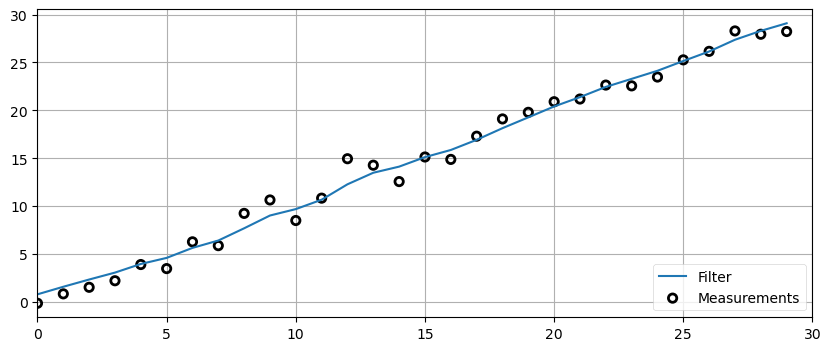

In [39]:
from numpy.random import randn
def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + randn()*noise_factor for i in range(count)]

measurements = gen_data(0, 1, 30, 1)
print("观测值的维度：", len(measurements))
data = g_h_filter(data=measurements, x0=0., dx=1., dt=1., g=.2, h=0.02)
plot_g_h_results(measurements, data)

### Discussion

`randn()` 返回以 0 为中心的随机数——它大于零的可能性与小于零的可能性一样大。 它在*标准差等于1*中变化——如果您不知道这意味着什么，请不要担心。 我已经绘制了对 randn() 的 3000 次调用 - 您可以看到这些值以零为中心，并且大部分范围从略低于 -1 到略高于 +1，尽管有时它们会大得多。

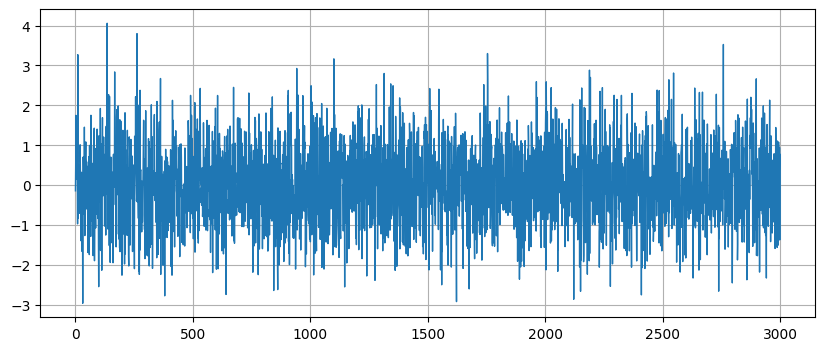

In [24]:
plt.plot([randn() for _ in range(3000)], lw=1);

## Exercise: Bad Initial Conditions（坏的初始化条件）

现在编写代码，使用 `gen_data` 和 `g_h_filter` 过滤从以5为初始值的 100 个数据点，导数为 2，噪声比例因子为 10，使用 g=0.2 和 h=0.02。 将您对 x 的初始猜测设置为 100。

In [ ]:
# your code here

### Solution and Discussion

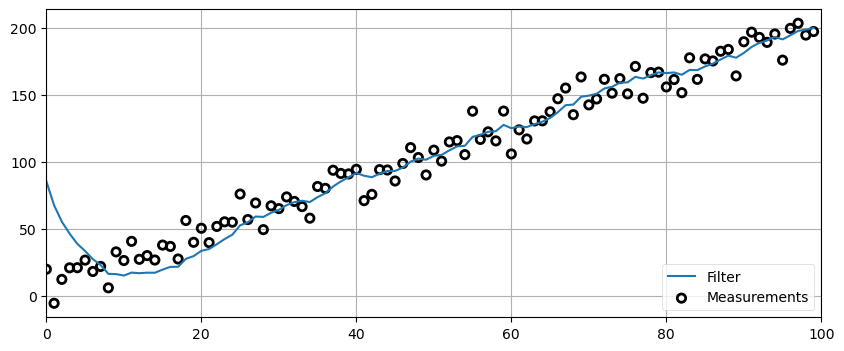

In [40]:
zs = gen_data(x0=5., dx=2., count=100, noise_factor=10)
data = g_h_filter(data=zs, x0=100., dx=2., dt=1., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

由于错误的初始猜测值 100，滤波器开始时的估计值与测量数据相差甚远。您可以看到它在确定测量数据之前“Ringing（响起）”。 “Ringing”是指信号以正弦型模式过冲（overshoots）和下冲（undershoots）数据。 这是滤波器中非常常见的现象，滤波器设计中的大量工作都致力于最大限度地减少Ringing。 这是一个我们还没有准备好讨论的话题，但我想向你展示这个现象。

## Exercise: Extreme Noise

重新运行相同的测试，但这次使用 100 的噪声因子。通过将初始条件从 100 更改为 5 来消除初始条件Ringing。

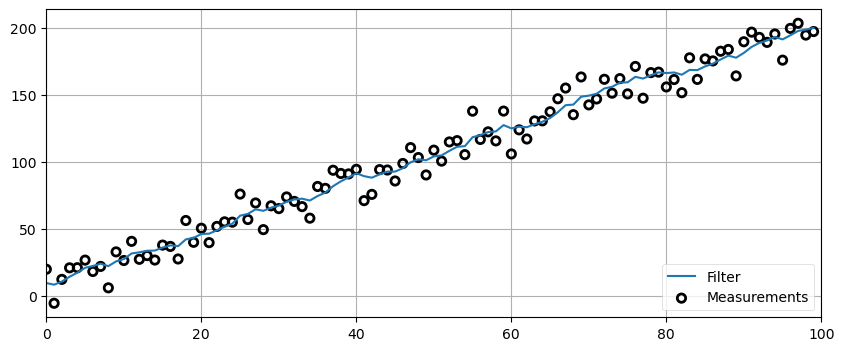

In [41]:
# your code here
data = g_h_filter(data=zs, x0=5., dx=2., dt=1., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

### Solution and Discussion

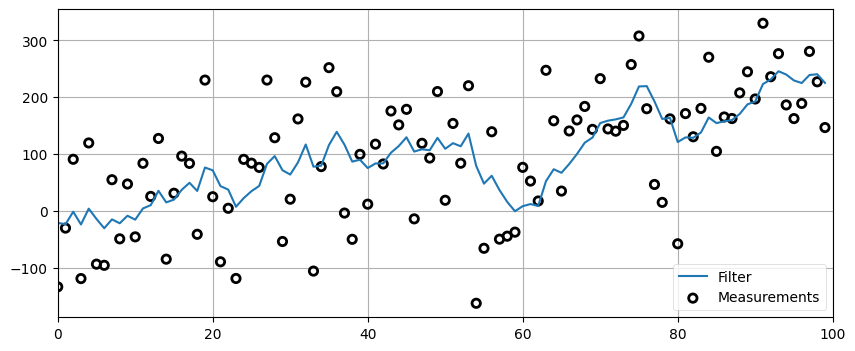

In [26]:
zs = gen_data(x0=5., dx=2., count=100, noise_factor=100)
data = g_h_filter(data=zs, x0=5., dx=2., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

这对我来说看起来并不那么美妙。 我们可以看到，也许滤波后的信号变化小于噪声信号，但它远离直线。 如果我们只绘制过滤后的结果，没有人会猜到信号从 5 开始并在每个时间步增加 2。 虽然在某些地方，滤波器似乎确实可以减少噪音，但在其他地方，它似乎会过冲和下冲。

在这一点上，我们还不足以真正判断这一点。 我们添加了**很多**的噪音； 也许这和滤波一样好。 然而，除了这一章之外，大量章节的存在应该表明我们可以做得更好。

## Exercise: The Effect of Acceleration

编写一个新的数据生成函数，为每个数据点添加一个恒定的加速因子。 换句话说，在计算每个数据点时增加 dx，以使速度 (dx) 不断增加。 将噪声设置为 0、$g=0.2$ 和 $h=0.02$，并使用 `plot_g_h_results` 或您自己的例程绘制结果。 玩转不同的加速和时间步长。 解释你所看到的。

In [ ]:
# your code here

### Solution and Discussion

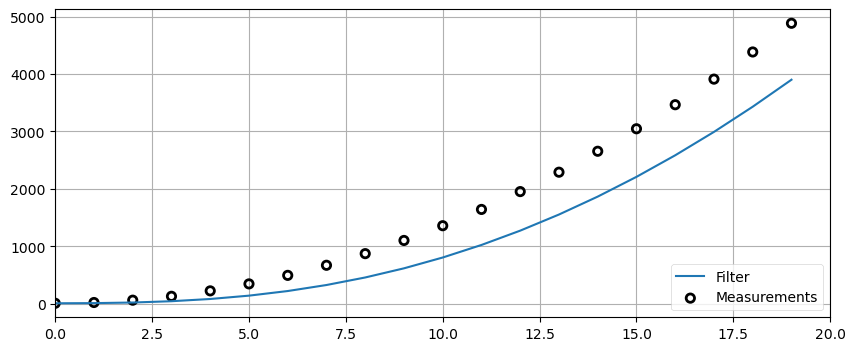

In [42]:
def gen_data(x0, dx, count, noise_factor, accel=0.):
    zs = []
    for i in range(count):
        # accel 恒定的一个加速度
        zs.append(x0 + accel * (i**2) / 2 + dx*i + randn()*noise_factor)
        dx += accel
    return zs
   
predictions = []
zs = gen_data(x0=10., dx=0., count=20, noise_factor=0, accel=9.)
data = g_h_filter(data=zs, x0=10., dx=0., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

每个预测都落后于信号。如果您考虑正在发生的事情，这是有道理的。我们的模型假设速度是恒定的。 g-h 滤波器计算 $x$ 的一阶导数（我们使用 $\dot{x}$ 表示导数）但不计算二阶导数 $\ddot{x}$。所以我们假设$\ddot{x}=0$。在每个预测步骤中，我们将 x 的新值预测为 $x + \dot{x}*t$。但是由于加速度的原因，预测必然落后于实际值。然后我们尝试计算 $\dot{x}$ 的新值，但由于 $h$ 因素，我们仅将 $\dot{x}$ 部分调整为新速度。在下一次迭代中，我们将再次失败。

请注意，我们无法对 $g$ 或 $h$ 进行调整来纠正此问题。这称为系统的*滞后误差*或*系统误差*。它是 g-h 滤波器的基本属性。也许您的头脑已经在建议解决此问题的解决方案或变通方法。正如你所预料的那样，已经有很多研究致力于这个问题，我们将在本书中介绍这个问题的各种解决方案。
> “take home”的一点是，滤波器仅与用于表达系统的数学模型一样好。
**注：** ZTH待进行函数重写实验

## Exercise: Varying $g$


现在让我们看看改变 $g$ 的效果。 在进行此练习之前，请记住 $g$ 是用于在测量和预测之间进行选择的比例因子。 您认为较大的 $g$ 会产生什么影响？ 较小的又会如何？

现在，让 `noise_factor=50` 和 `dx=5`。 绘制 $g = 0.1\mbox{, } 0.4,\mbox{ 和 } 0.8$ 的结果。

In [ ]:
# your code here

### Solution and Discussion

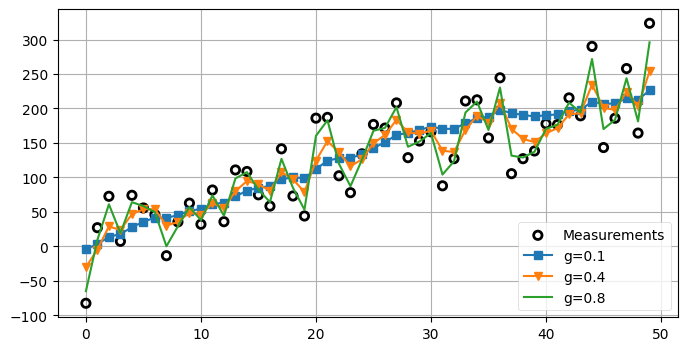

In [28]:
np.random.seed(100)
zs = gen_data(x0=5., dx=5., count=50, noise_factor=50)
data1 = g_h_filter(data=zs, x0=0., dx=5., dt=1., g=0.1, h=0.01)
data2 = g_h_filter(data=zs, x0=0., dx=5., dt=1., g=0.4, h=0.01)
data3 = g_h_filter(data=zs, x0=0., dx=5., dt=1., g=0.8, h=0.01)

with book_plots.figsize(y=4):
    book_plots.plot_measurements(zs, color='k')
    book_plots.plot_filter(data1, label='g=0.1', marker='s', c='C0')
    book_plots.plot_filter(data2, label='g=0.4', marker='v', c='C1')
    book_plots.plot_filter(data3, label='g=0.8', c='C2')
    plt.legend(loc=4)

很明显，随着 $g$ 更大，我们更密切地遵循测量而不是预测。 当 $g=0.8$ 时，我们几乎完全遵循信号，并且几乎不拒绝任何噪声。 人们可能会天真地得出结论，$g$ 应该始终非常小，以最大限度地抑制噪声。 然而，这意味着我们大多忽略了有利于我们预测的测量结果。 当信号变化不是由于噪声而是实际状态变化时会发生什么？ 我们来看一下。 在更改为 $\dot{x}=0$ 之前，我将创建 $\dot{x}=1$ 的 9 个步骤的数据。

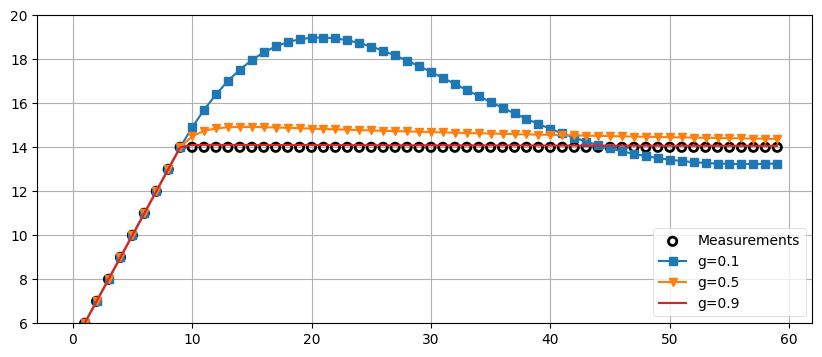

In [29]:
zs = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for i in range(50):
    zs.append(14)

data1 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.1, h=0.01)
data2 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.5, h=0.01)
data3 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.9, h=0.01)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label='g=0.1', marker='s', c='C0')
book_plots.plot_filter(data2, label='g=0.5', marker='v', c='C1')
book_plots.plot_filter(data3, label='g=0.9', c='C3')
plt.legend(loc=4)
plt.ylim([6, 20]);

在这里我们可以看到忽略信号的效果。 我们不仅滤除噪声，而且还滤除信号中的合法变化。

也许我们需要一个“Goldilocks”滤波器，其中 $g$ 不是太大，也不是太小，但恰到好处？ 嗯，不完全是。 如前所述，不同的滤波器根据问题的数学属性以不同的方式选择 $g$ 和 $h$。 例如，发明了 Benedict-Bordner 滤波器以最小化此示例中的瞬态误差，其中 $\dot{x}$ 进行了一步跳跃。 我们不会在本书中讨论这个滤波器，但这里有两个图选择了不同的 $g$ 和 $h$ 对。 这种滤波器设计最大限度地减少了 $\dot{x}$ 中步进跳跃的瞬态错误，但代价是对于 $\dot{x}$ 中的其他类型的变化不是最优的。

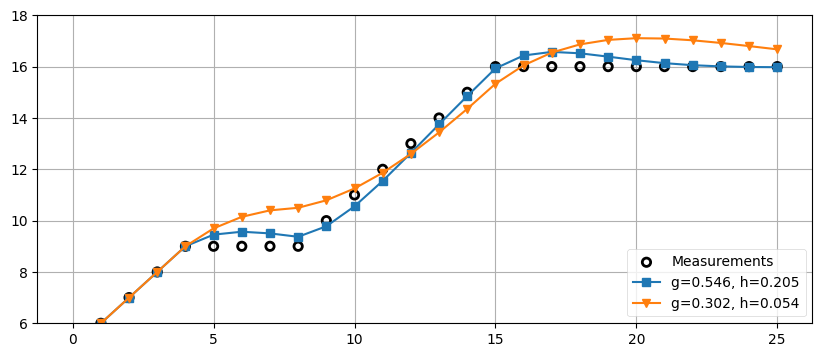

In [30]:
zs = [5,6,7,8,9,9,9,9,9,10,11,12,13,14,
      15,16,16,16,16,16,16,16,16,16,16,16]
data1 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=.302, h=.054)
data2 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=.546, h=.205)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data2, label='g=0.546, h=0.205', marker='s', c='C0')
book_plots.plot_filter(data1, label='g=0.302, h=0.054', marker='v', c='C1')
plt.legend(loc=4)
plt.ylim([6, 18]);

## Varying $h$

现在让 $g$ 保持不变，研究修改 $h$ 的效果。我们知道 $h$ 会影响我们对 $\dot{x}$ 的测量与我们的预测的偏好程度。但是，这是什么意思*？如果我们的信号变化很大（相对于我们的滤波器的时间步长来说很快），那么大的 $h$ 将使我们对这些瞬态变化做出快速反应。较小的 $h$ 会使我们反应更慢。

我们将看三个例子。我们有一个无噪声的测量，它以 50 步从 0 缓慢变为 1。我们的第一个滤波器为 $\dot{x}$ 和一个小的 $h$ 使用了一个几乎正确的初始值。从输出可以看出，滤波器输出与信号非常接近。第二个过滤器使用 $\dot{x}=2$ 的非常错误的猜测。在这里，我们看到滤波器“振铃”，直到它稳定下来并找到信号。第三个过滤器使用相同的条件，但现在设置 $h=0.5$。如果您查看振铃的幅度，您会发现它比第二张图表中的要小得多，但频率更大。它也比第二个过滤器更快地稳定下来，虽然不是很多。

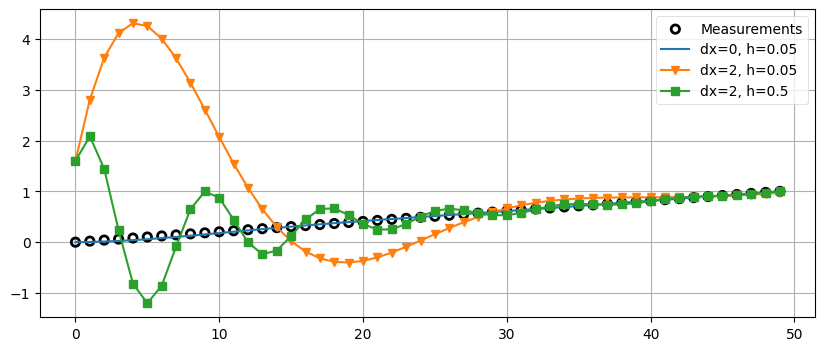

In [31]:
zs = np.linspace(0, 1, 50)

data1 = g_h_filter(data=zs, x0=0, dx=0., dt=1., g=.2, h=0.05)
data2 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.05)
data3 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.5)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label='dx=0, h=0.05', c='C0')
book_plots.plot_filter(data2, label='dx=2, h=0.05', marker='v', c='C1')
book_plots.plot_filter(data3, label='dx=2, h=0.5',  marker='s', c='C2')
plt.legend(loc=1);

## Interactive Example

对于那些在 Jupyter Notebook 中运行此程序的人，我编写了一个交互式版本的滤波器，因此您可以实时查看更改 $\dot{x}$、$g$ 和 $h$ 的效果。当您调整 $\dot{x}$、$g$ 和 $h$ 的滑块时，数据将被重新过滤并为您绘制结果。

如果您真的想测试自己，请阅读下一段并在移动滑块之前尝试预测结果。

要尝试的一些事情包括将 $g$ 和 $h$ 设置为它们的最小值。看看滤波器如何完美地跟踪数据！这只是因为我们完美地预测了体重增加。将 $\dot{x}$ 调整为大于或小于 5。滤波器应该从数据中分离出来，并且永远不要重新获取它。开始添加 $g$ 或 $h$ 并查看过滤器如何快速恢复到数据。看看当你只添加 $g$ 与只添加 $h$ 时，该行的区别是什么。你能解释造成差异的原因吗？然后尝试设置$g$ 大于1。你能解释一下结果吗？将$g$ 放回到一个合理的值（例如0.1），然后使$h$ 变得非常大。你能解释一下这些结果吗？最后，将 $g$ 和 $h$ 设置为它们的最大值。
 
如果您想进一步探索，请将数组 `zs` 的值更改为上面任何图表中使用的值，然后重新运行单元格以查看结果。


In [63]:
from ipywidgets import interact

# my FloatSlider returns an ipywidgets.FloatSlider with
# continuous_update=False. Filtering code runs too slowly
# to instantly react to slider changes.
from kf_book.book_plots import FloatSlider

zs1 = gen_data(x0=5, dx=5., count=100, noise_factor=50)

fig = None
def interactive_gh(x, dx, g, h):
    global fig
    if fig is not None: plt.close(fig)
    fig = plt.figure()
    data = g_h_filter(data=zs1, x0=x, dx=dx, g=g, h=h)
    plt.scatter(range(len(zs1)), zs1, edgecolor='k', 
                facecolors='none', marker='o', lw=1)
    plt.plot(data, color='b')

interact(interactive_gh,           
         x=FloatSlider(value=0, min=-200, max=200), 
         dx=FloatSlider(value=5, min=-50, max=50), 
         g=FloatSlider(value=.1, min=.01, max=2, step=.02), 
         h=FloatSlider(value=.02, min=.0, max=.5, step=.01));

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x', max=200.0, min=-200.0),…

## Don't Lie to the Filter

您可以自由地将 $g$ 和 $h$ 设置为任何值。 这是一个滤波器，尽管存在极端噪音，但仍能完美运行。

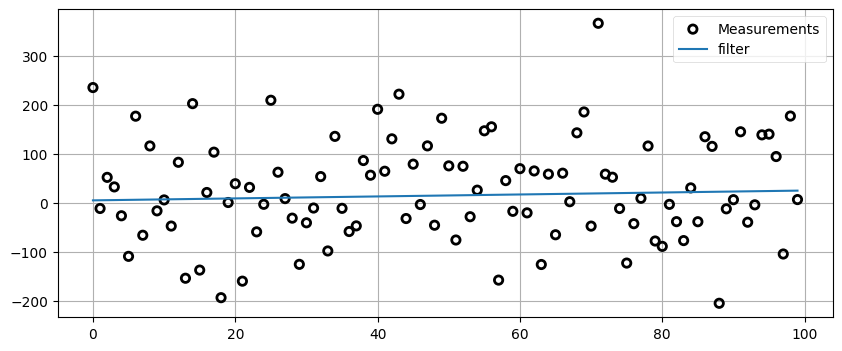

In [33]:
zs = gen_data(x0=5., dx=.2, count=100, noise_factor=100)
data = g_h_filter(data=zs, x0=5., dx=.2, dt=1., g=0., h=0.)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data, label='filter')
plt.legend(loc=1);

我从非常嘈杂的数据中出色地提取了一条直线！也许我现在不应该尝试收集我的数学菲尔兹奖。我通过将 $g$ 和 $h$ 都设置为 0 来做到这一点。这是做什么的？它使滤波器忽略测量值，因此对于每次更新，它都会将新位置计算为 $x + \Delta x \Delta t$。当然，如果我们忽略测量结果，结果是一条直线。

忽略测量值的滤波器是无用的。我知道您永远不会将 $g$ 和 $h$ 都设置为零，因为这需要一种只有我拥有的特殊天赋，但我保证如果您不小心，您会将它们设置为低于应有的水平。您总是可以从测试数据中获得漂亮的结果。当您尝试对不同数据进行滤波时，您会对结果感到失望，因为您针对特定数据集微调了常量。 $g$ 和 $h$ 必须反映您正在滤波的系统的真实世界行为，而不是某个特定数据集的行为。在后面的章节中，我们将学到很多关于如何做到这一点的知识。现在我只能说要小心，否则你的测试数据会得到完美的结果，但是一旦你切换到真实数据，就会得到这样的结果：

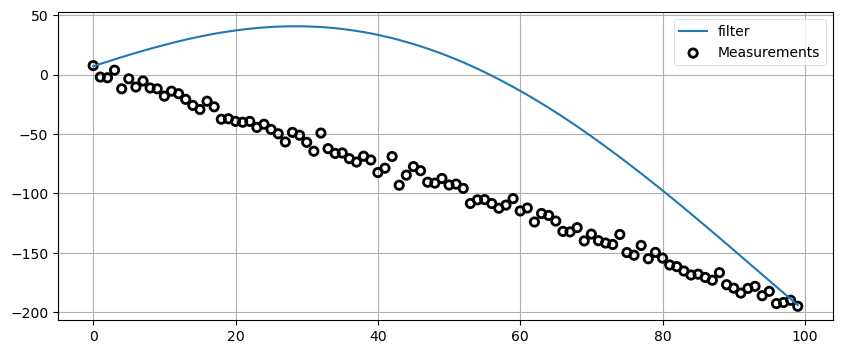

In [66]:
zs = gen_data(x0=5, dx=-2, count=100, noise_factor=5)
data = g_h_filter(data=zs, x0=5., dx=2., dt=1., g=.005, h=0.001)
book_plots.plot_measurements(zs)
book_plots.plot_filter(data, label='filter')
plt.legend(loc=1);

## Tracking a Train

我们准备好了一个实际的例子。在本章前面我们谈到了跟踪火车。火车又重又慢，因此它们不能快速改变速度。他们在轨道上，所以他们不能改变方向，除非减速到停止然后倒车。因此，我们可以得出结论，如果我们已经知道火车的大致位置和速度，那么我们可以非常准确地预测它在不久的将来的位置。一列火车在一两秒钟内不能改变它的速度。

因此，让我们为火车编写一个滤波器。它的位置表示为它在轨道上相对于某个固定点的位置，我们说它是 0 公里。即，位置 1 表示火车距离固定点 1 公里。速度以米/秒表示。我们每秒进行一次位置测量，误差为$\pm$ 500 米。我们应该如何实现我们的滤波器？

首先，让我们模拟没有滤波器的情况。我们将假设火车目前在 23 公里处，并以 15 m/s 的速度行驶。我们可以将其编码为

```python
pos = 23*1000
vel = 15
```

现在我们可以在未来某个时间计算火车的位置，*假设*速度没有变化，用

```python
def compute_new_position(pos, vel, dt=1):
    return pos + (vel * dt)
```

我们可以通过在该位置添加一些随机噪声来模拟测量。 这里我们的误差是 500m，所以代码可能如下所示：

```python
def measure_position(pos):
        return pos + random.randn()*500
```
        
让我们把它放在一个单元格中并绘制 100 秒的模拟结果。 我将使用 NumPy 的 `asarray` 函数将数据转换为

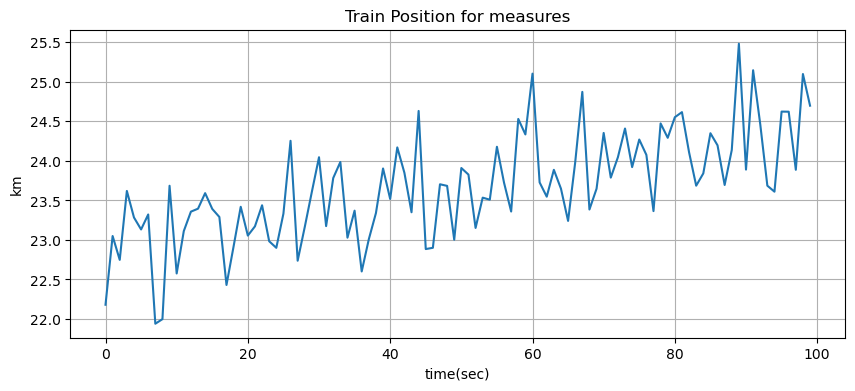

In [67]:
from numpy.random import randn

def compute_new_position(pos, vel, dt=1.):
    """ dt is the time delta in seconds."""
    return pos + (vel * dt)

def measure_position(pos):
    return pos + randn()*500

def gen_train_data(pos, vel, count):
    zs = []
    for t in range(count):
        pos = compute_new_position(pos, vel)
        zs.append(measure_position(pos))
    return np.asarray(zs)
  
pos, vel = 23.*1000, 15.
zs = gen_train_data(pos, vel, 100)

plt.plot(zs / 1000.)  # convert to km
book_plots.set_labels('Train Position for measures', 'time(sec)', 'km')

我们可以从图表中看到测量结果有多差。 没有真正的火车可以那样移动。

那么如果我们想对这些数据进行滤波，我们应该将 $g$ 和 $h$ 设置为什么？ 我们还没有为此展开理论，但让我们试着根据自己的实际情况得到一个合理的答案。 我们知道测量结果非常不准确，因此我们根本不想给它们太多权重。 为此，我们需要选择一个非常小的 $g$。 我们也知道火车不能快速加速或减速，所以我们也想要一个非常小的 $h$。 例如：

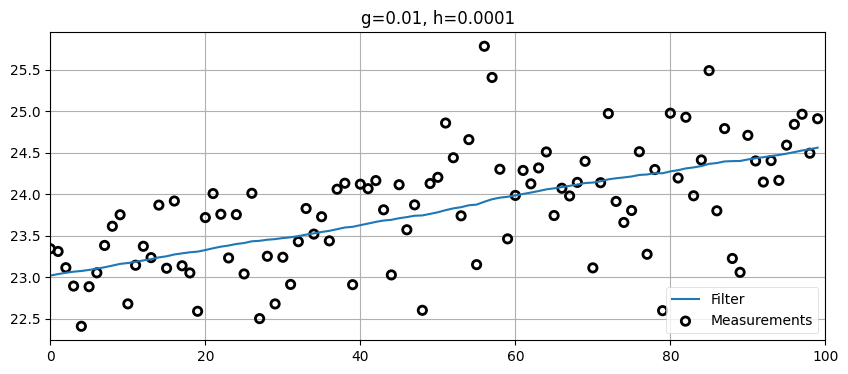

In [36]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.01, h=0.0001)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.0001')

这对于初步猜测来说非常好。 让我们把 $g$ 变大看看效果。

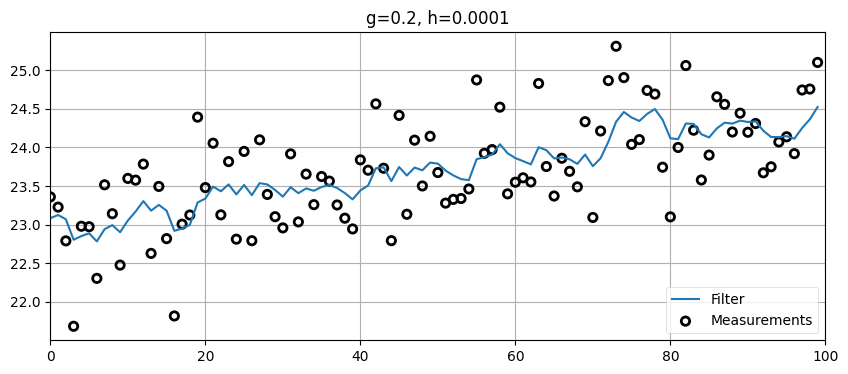

In [37]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.2, h=0.0001)
plot_g_h_results(zs/1000., data/1000., 'g=0.2, h=0.0001')

我们设置了“g=0.2”，我们可以看到虽然火车的位置被平滑，但估计的位置（以及因此速度）在一个非常小的帧内波动很大，远远超过真正的火车可以做的。 所以凭经验我们知道我们想要`g<<0.2`。

现在让我们看看 $h$ 选择不当的效果。

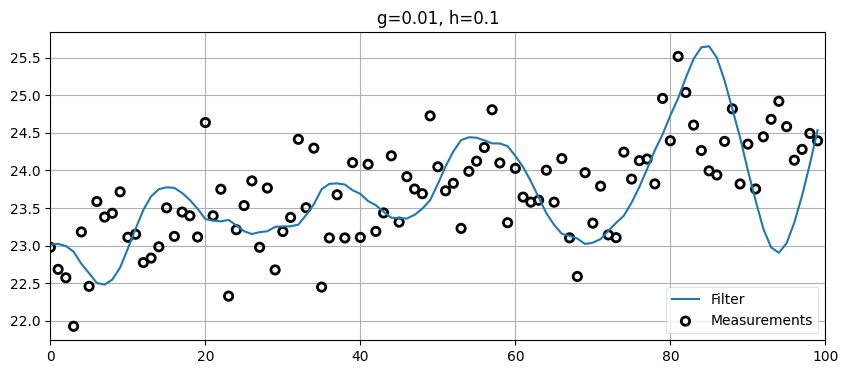

In [38]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=0.01, h=0.1)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.1')

由于较小的 $g$，此处的位置变化平滑，但较大的 $h$ 使滤波器对测量非常敏感。 发生这种情况是因为在几秒钟内，快速变化的测量意味着非常大的速度变化，并且大的 $h$ 告诉滤波器对这些变化快速做出反应。 火车不能快速改变速度，所以滤波器不能很好地过滤数据——滤波器改变速度的速度比火车快。

最后，让我们为火车添加一些加速度。 我不知道火车实际上可以加速多快，但假设它以 0.2 m/sec^2 的速度加速。

In [39]:
def gen_train_data_with_acc(pos, vel, count):
    zs = []
    for t in range(count):
        pos = compute_new_position(pos, vel)
        vel += 0.2
        zs.append(measure_position(pos))
    return np.asarray(zs) 

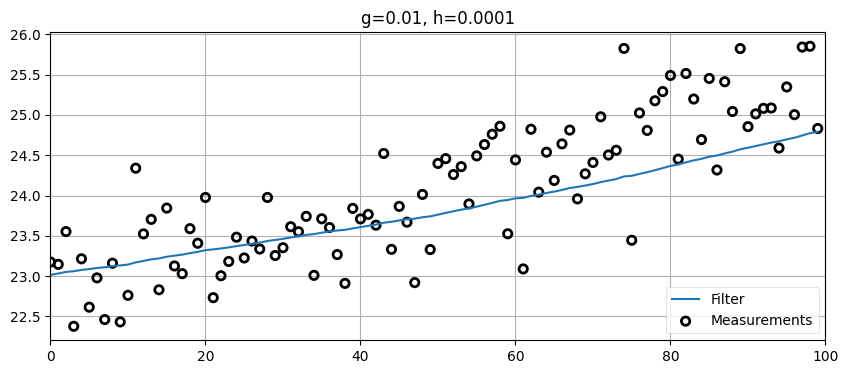

In [40]:
zs = gen_train_data_with_acc(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.01, h=0.0001)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.0001')

在这里，我们看到由于加速度，滤波器不再完全跟踪火车。 我们可以摆弄 $h$ 让它更好地跟踪，但代价是不那么平滑的过滤估计。

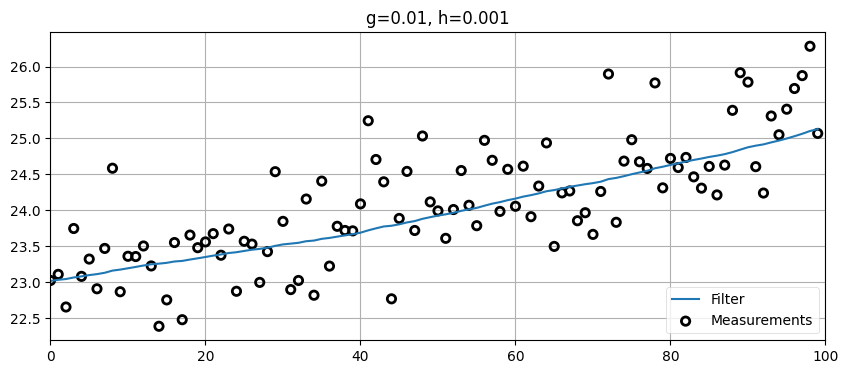

In [41]:
zs = gen_train_data_with_acc(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.01, h=0.001)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.001')

这里有两个教训需要学习。首先，使用 $h$ 项来响应您未建模的速度变化。但是，更重要的是，在快速准确地响应行为变化和在系统处于稳定状态时产生理想输出之间存在权衡。如果火车从不改变速度，我们将使$h$ 变得非常小，以避免过滤后的估计受到测量噪声的过度影响。但是在一个有趣的问题中，状态几乎总是会发生变化，我们希望快速对它们做出反应。我们对它们的反应越快，我们就越容易受到传感器噪声的影响。

我可以继续，但我的目标不是在这里发展 g-h 滤波器理论，而是深入了解结合测量和预测如何导致过滤解决方案。有大量关于为此类问题选择 $g$ 和 $h$ 的文献，并且有选择它们以实现各种目标的最佳方法。正如我之前解释的那样，在对这样的测试数据进行试验时，很容易对过滤器“撒谎”。在随后的章节中，我们将学习卡尔曼滤波器如何以相同的基本方式解决这个问题，但数学要复杂得多。

## g-h Filters with FilterPy

[FilterPy](https://github.com/rlabbe/filterpy)是我自己写的一个开源滤波库。 它具有本书中的所有过滤器以及其他过滤器。 编写自己的 g-h 过滤器相当容易，但随着我们的进步，我们将更多地依赖 FilterPy。 作为一个快速介绍，让我们看一下 FilterPy 中的 g-h 过滤器。

如果您没有安装 FilterPy，只需从命令行发出以下命令。

    pip install filterpy
    
有关从 GitHub 安装或下载 FilterPy 的更多信息，请阅读附录 A。

要使用 g-h 过滤器，请导入它并从类 `GHFilter` 创建一个对象。

In [42]:
from filterpy.gh import GHFilter
f = GHFilter(x=0., dx=0., dt=1., g=.8, h=.2)

当您构造对象时，您指定信号的初始值和变化率（`x` 和 'dx'），更新之间的时间步长（`dt`）和两个过滤器参数（`g` 和 `h` ）。 `dx` 必须具有相同的 `x`/`dt` 单位 - 如果 `x` 以米为单位而 `dt` 以秒为单位，则 `dx` 必须以米/秒为单位。

要运行滤波器调用更新，请在参数“z”中传递测量值，您会记得这是文献中测量值的标准名称。

In [43]:
f.update(z=1.2)

(0.96, 0.24)

`update()` 在元组中返回 `x` 和 `dx` 的新值，但您也可以从对象中访问它们。

In [44]:
print(f.x, f.dx)

0.96 0.24


您可以动态更改“g”和“h”。

In [45]:
print(f.update(z=2.1, g=.85, h=.15))

(1.965, 0.375)


您可以批量过滤一系列测量。

In [46]:
print(f.batch_filter([3., 4., 5.]))

[[1.965 0.375]
 [2.868 0.507]
 [3.875 0.632]
 [4.901 0.731]]


您可以过滤多个自变量。 如果您正在跟踪一架飞机，您需要在 3D 空间中跟踪它。 对“x”、“dx”和测量值使用 NumPy 数组。

In [47]:
x_0  = np.array([1., 10., 100.])
dx_0 = np.array([10., 12., .2])
               
f_air = GHFilter(x=x_0, dx=dx_0, dt=1., g=.8, h=.2)
f_air.update(z=np.array((2., 11., 102.)))
print(' x =', f_air.x)
print('dx =', f_air.dx)

 x = [  3.8   13.2  101.64]
dx = [8.2  9.8  0.56]


`GHFilterOrder` 类允许您创建 0、1 或 2 阶过滤器。g-h 滤波器是 1 阶过滤器。我们尚未讨论的 g-h-k 滤波器也跟踪加速度。 这两个类都具有实际应用程序所需的功能，例如计算方差减少因子（VRF），我们在本章中没有讨论。 我可以写一本关于 g-h 滤波器的理论和应用的书，但我们在这本书中还有其他目标。 如果您有兴趣，请探索 FilterPy 代码并进一步阅读。

FilterPy 的文档位于 https://filterpy.readthedocs.org/。

## Summary

我鼓励您尝试使用此滤波器，以加深您对它的反应的理解。不应该花费太多的尝试来意识到 $g$ 和 $h$ 的临时选择表现不佳。一个特定的选择可能在一种情况下表现良好，但在另一种情况下表现很差。即使您了解 $g$ 和 $h$ 的影响，也很难选择合适的值。事实上，您极不可能为任何给定问题选择最优的 $g$ 和 $h$ 值。滤波器是*设计的*，不是*特设的*。

在某些方面，我不想在这里结束这一章，因为我们可以说关于选择 $g$ 和 $h$ 的内容很多。但是这种形式的 g-h 滤波器并不是本书的目的。设计卡尔曼滤波器需要你指定一些参数——它们间接地与选择 $g$ 和 $h$ 相关，但是在设计卡尔曼滤波器时你永远不会直接引用它们。此外，$g$ 和 $h$ 将在每个时间步以非常不明显的方式变化。

这些滤波器还有一个我们几乎没有涉及到的特性——贝叶斯统计。您会注意到“贝叶斯”一词在本书的标题中；这不是巧合！我们暂时将 $g$ 和 $h$ 抛在脑后，大部分未开发，并开发一种非常强大的关于过滤的概率推理形式。然而突然之间，同样的 g-h 滤波器算法将出现，这一次具有正式的数学大厦，允许我们从多个传感器创建滤波器，准确估计解决方案中的误差量，并控制机器人。